In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio

In [2]:
matdata = sio.loadmat('/content/mnist-original.mat')
df = pd.DataFrame(matdata['data'])



In [3]:
matdata

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Mar 30 03:19:02 2014',
 '__version__': '1.0',
 '__globals__': [],
 'mldata_descr_ordering': array([[array(['label'], dtype='<U5'), array(['data'], dtype='<U4')]],
       dtype=object),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'label': array([[0., 0., 0., ..., 9., 9., 9.]])}

In [4]:

data = matdata['data']
labels = matdata['label']


data = data.T


df = pd.DataFrame(data)
df['label'] = labels[0]

In [5]:
# prompt: check missing value

df.isnull().sum()


,0
0,0
1,0
2,0
3,0
4,0
...,...
780,0
781,0
782,0
783,0



Outliers in column 0 (using IQR):
 Series([], Name: 0, dtype: uint8)

Outliers in column 0 (using Z-score):
 Series([], Name: 0, dtype: uint8)


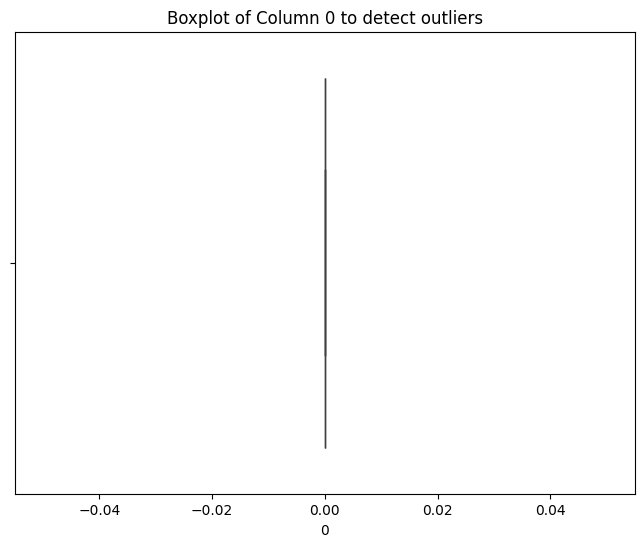

In [6]:


# Method 1: Using IQR (Interquartile Range)
def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Example usage for a single column (replace '0' with the column index you want to check)
outliers_column_0 = find_outliers_iqr(df[0])
print("\nOutliers in column 0 (using IQR):\n", outliers_column_0)

# Method 2: Using Z-score
from scipy import stats

def find_outliers_zscore(data, threshold=3):
    z = np.abs(stats.zscore(data))
    outliers = data[z > threshold]
    return outliers

# Example usage for a single column
outliers_column_0_zscore = find_outliers_zscore(df[0])
print("\nOutliers in column 0 (using Z-score):\n", outliers_column_0_zscore)


# Visualization (example using boxplot for the first column)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[0])
plt.title("Boxplot of Column 0 to detect outliers")
plt.show()



In [7]:
# prompt: import svm linear

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Assuming 'df' and 'labels' are defined as in your previous code

# Prepare the data
X = df.drop('label', axis=1)  # Features
y = df['label']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train 20% test

# Initialize and train the linear SVM model
svm_model = LinearSVC(max_iter=10000) # Increased max_iter to ensure convergence. Adjust if needed.
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Linear SVM model: {accuracy}")


Accuracy of the Linear SVM model: 0.9156428571428571


In [8]:
# prompt: import svm rbf

from sklearn.svm import SVC

# Initialize and train the RBF SVM model
svm_rbf_model = SVC(kernel='rbf', C=1, gamma='scale') # You can tune C and gamma
svm_rbf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rbf = svm_rbf_model.predict(X_test)

# Evaluate the model
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"Accuracy of the RBF SVM model: {accuracy_rbf}")


Accuracy of the RBF SVM model: 0.9794285714285714


In [ ]:
# prompt: save using pickle

import pickle

# Assuming 'svm_rbf_model' is your trained model
filename = 'svm_rbf_model.sav'
pickle.dump(svm_rbf_model, open(filename, 'wb'))
